In [1]:
!pip install --upgrade xlrd
from sklearn.linear_model import LinearRegression

import tqdm
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, show
from google.colab import drive
import plotly.graph_objects as go

drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


KeyError: 'TBE_EPHEM_CREDS_ADDR'

In [6]:
fname_list = os.listdir("/content/drive/MyDrive/DL_data/DACON6/서울시 인구 이동/서울시 8월 생활이동데이터")

fname_list.sort(reverse=False)

fname_list

['생활이동_행정동_2022.08_00시.csv',
 '생활이동_행정동_2022.08_01시.csv',
 '생활이동_행정동_2022.08_02시.csv',
 '생활이동_행정동_2022.08_03시.csv',
 '생활이동_행정동_2022.08_04시.csv',
 '생활이동_행정동_2022.08_05시.csv',
 '생활이동_행정동_2022.08_06시.csv',
 '생활이동_행정동_2022.08_07시.csv',
 '생활이동_행정동_2022.08_08시.csv',
 '생활이동_행정동_2022.08_09시.csv',
 '생활이동_행정동_2022.08_10시.csv',
 '생활이동_행정동_2022.08_11시.csv',
 '생활이동_행정동_2022.08_12시.csv',
 '생활이동_행정동_2022.08_13시.csv',
 '생활이동_행정동_2022.08_14시.csv',
 '생활이동_행정동_2022.08_15시.csv',
 '생활이동_행정동_2022.08_16시.csv',
 '생활이동_행정동_2022.08_17시.csv',
 '생활이동_행정동_2022.08_18시.csv',
 '생활이동_행정동_2022.08_19시.csv',
 '생활이동_행정동_2022.08_20시.csv',
 '생활이동_행정동_2022.08_21시.csv',
 '생활이동_행정동_2022.08_22시.csv',
 '생활이ᄃ

In [ ]:
year_month = []
total_sum = []


target_dir = "/content/drive/MyDrive/DL_data/DACON6/지하철 이용 정보/교통카드 통계자료/"

fname_list = os.listdir("/content/drive/MyDrive/DL_data/DACON6/지하철 이용 정보/교통카드 통계자료")
fname_list.sort(reverse=False)

for folder in fname_list: # 2020년부터 코로나라는 변수가 전체 이용인구에 영향을 미침
    excel_list = os.listdir(target_dir+folder)
    excel_list.sort(reverse=False)
    for fname in excel_list:
        print(folder, fname)
        df = pd.read_excel(target_dir+folder+'/'+fname, sheet_name="지하철 노선별 역별 이용현황")

        if '승차승객수' in df.columns:
          df['승차승객수'] = df['승차승객수'].str.replace(',', '').astype(float)
          sum_ = df['승차승객수'].sum()
        else:
          df['승차인원'] = df['승차인원'].str.replace(',', '').astype(float)
          sum_ = df['승차인원'].sum()

        year_month.append(df['사용월'][0])
        total_sum.append(sum_)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_

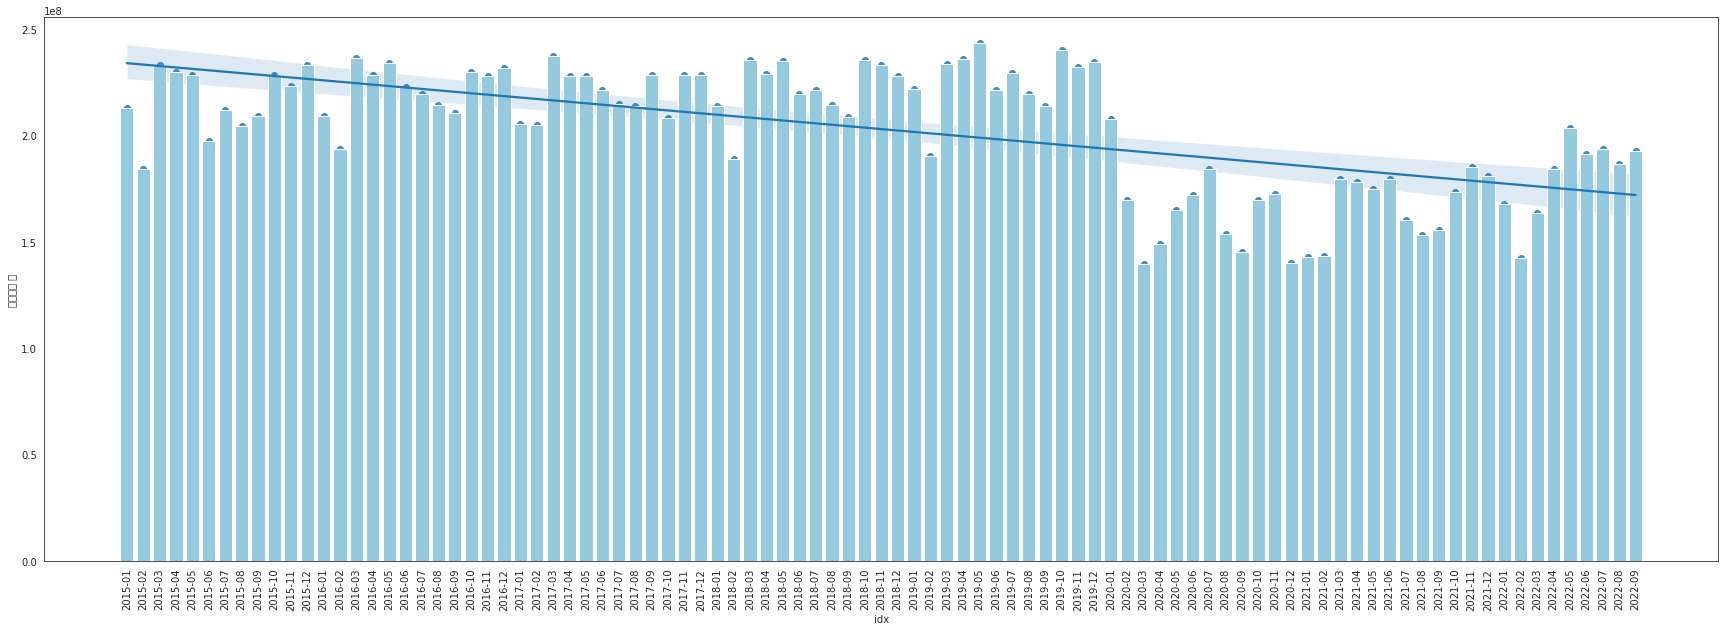

In [ ]:
df_1 = pd.DataFrame(zip(year_month, total_sum), columns = ['년월', '승차인원 합'])
df_1['idx'] = range(len(year_month))
fig, ax = plt.subplots(figsize=(30,10))

sns.set_style('white')

ax = sns.barplot(x='년월', y='승차인원 합', 
               data=df_1, palette=['skyblue']*len(year_month))

plt.xticks(rotation=90)

ax = sns.regplot(x='idx', y='승차인원 합', data=df_1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_

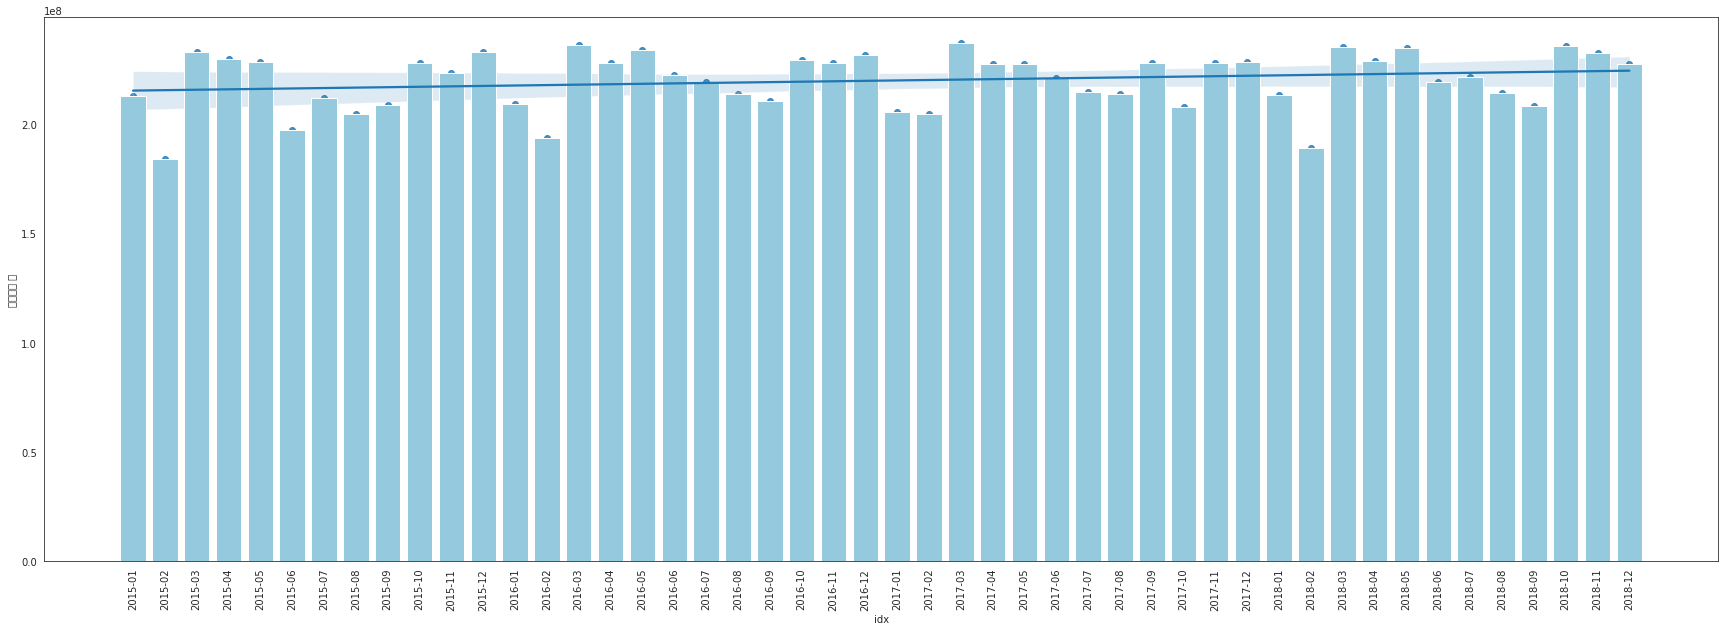

In [ ]:
year_month = []
total_sum = []


target_dir = "/content/drive/MyDrive/DL_data/DACON6/지하철 이용 정보/교통카드 통계자료/"

fname_list = os.listdir("/content/drive/MyDrive/DL_data/DACON6/지하철 이용 정보/교통카드 통계자료")
fname_list.sort(reverse=False)

for folder in fname_list[:4]: # 2020년부터 코로나라는 변수가 전체 이용인구에 영향을 미침
    excel_list = os.listdir(target_dir+folder)
    excel_list.sort(reverse=False)
    
    for fname in excel_list:
        df = pd.read_excel(target_dir+folder+'/'+fname, sheet_name="지하철 노선별 역별 이용현황")

        if '승차승객수' in df.columns:
          df['승차승객수'] = df['승차승객수'].str.replace(',', '').astype(float)
          sum_ = df['승차승객수'].sum()
        else:
          df['승차인원'] = df['승차인원'].str.replace(',', '').astype(float)
          sum_ = df['승차인원'].sum()

        year_month.append(df['사용월'][0])
        total_sum.append(sum_)



df_1 = pd.DataFrame(zip(year_month, total_sum), columns = ['년월', '승차인원 합'])
df_1['idx'] = range(len(year_month))
fig, ax = plt.subplots(figsize=(30,10))

sns.set_style('white')

ax = sns.barplot(x='년월', y='승차인원 합', 
               data=df_1, palette=['skyblue']*len(year_month))

plt.xticks(rotation=90)

ax = sns.regplot(x='idx', y='승차인원 합', data=df_1)


'2015-12'

# 서울시 65세 이상 노인 인구 파악

In [ ]:
fname_list

['LOCAL_PEOPLE_DONG_202101.csv',
 'LOCAL_PEOPLE_DONG_202102.csv',
 'LOCAL_PEOPLE_DONG_202103.csv',
 'LOCAL_PEOPLE_DONG_202104.csv',
 'LOCAL_PEOPLE_DONG_202105.csv',
 'LOCAL_PEOPLE_DONG_202106.csv',
 'LOCAL_PEOPLE_DONG_202107.csv',
 'LOCAL_PEOPLE_DONG_202108.csv',
 'LOCAL_PEOPLE_DONG_202109.csv',
 'LOCAL_PEOPLE_DONG_202110.csv',
 'LOCAL_PEOPLE_DONG_202111.csv',
 'LOCAL_PEOPLE_DONG_202112.csv',
 'LOCAL_PEOPLE_DONG_202201.csv',
 'LOCAL_PEOPLE_DONG_202202.csv',
 'LOCAL_PEOPLE_DONG_202203.csv',
 'LOCAL_PEOPLE_DONG_202204.csv',
 'LOCAL_PEOPLE_DONG_202205.csv',
 'LOCAL_PEOPLE_DONG_202206.csv',
 'LOCAL_PEOPLE_DONG_202207.csv',
 'LOCAL_PEOPLE_DONG_202208.csv']

In [48]:
target_dir = "/content/drive/MyDrive/DL_data/DACON6/서울시 인구 거주/서울시 행정동 단위 생활인구/"

fname_list = os.listdir(target_dir)
fname_list.sort(reverse=False)

df = pd.read_csv(target_dir + '/' + fname_list[22], index_col=False, engine='python')  # index_col : unnamed cell 제거

df

/usr/local/lib/python3.7/dist-packages/pandas/io/parsers/readers.py:586: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  return _read(filepath_or_buffer, kwds)


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20181101,0,11110515,14799.0314,489.8446,312.1301,493.4818,484.2561,463.3706,486.0634,...,442.1121,483.7973,694.3211,768.4976,803.8630,572.8530,476.6775,407.1267,491.9050,1274.6222
1,20181101,0,11110540,5072.4639,68.5522,52.5271,331.0671,252.8436,172.7127,179.7855,...,122.8208,142.8454,200.8265,185.8934,155.6270,186.6237,198.3063,185.9573,171.8843,503.2241
2,20181101,0,11110550,13510.7258,296.9959,230.2863,355.1712,530.7080,438.1504,361.4088,...,382.5184,437.4985,541.8144,493.2076,642.4960,655.1849,488.8321,612.6179,323.6644,1417.2739
3,20181101,0,11110560,22047.6664,631.9267,457.0936,632.7882,612.5082,608.7870,513.3366,...,467.2121,570.1048,795.0337,781.8997,1067.2416,932.3145,1074.0614,1025.2258,747.4158,2495.0940
4,20181101,0,11170530,10764.3579,210.1115,101.3827,195.1805,562.6486,550.6451,562.9493,...,544.9739,479.1962,453.2349,330.4576,335.1968,313.0150,367.0382,299.8554,234.3563,519.1046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305275,20181130,23,11170555,24488.2852,441.7151,318.0344,647.9890,955.1457,1162.6281,1033.9073,...,1480.0733,1066.9002,949.5954,861.9360,786.5937,747.4397,899.3005,695.7175,569.3076,1674.4972
305276,20181130,23,11320690,23258.6589,852.3579,490.7520,610.5882,831.4708,753.7719,742.2331,...,732.6553,705.6584,839.3690,802.2416,1019.5401,995.4382,1060.1146,1007.1889,743.9164,1635.3824
305277,20181130,23,11620645,29183.8867,675.9424,270.6467,477.8329,1857.5750,2609.4230,1981.8842,...,2242.5253,1348.0348,1037.5041,809.8884,658.3974,840.2300,971.0860,798.0711,664.6635,1676.4791
305278,20181130,23,11410640,18709.2160,647.1500,358.8280,519.4367,582.6010,554.7007,467.3135,...,533.3243,539.7419,629.0819,689.6591,886.9859,743.2761,735.4832,779.1709,661.2483,1931.7480


In [40]:
cnt_df = len(df)

old_men_polulation = df.loc[:, ['여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수']].sum().sum(axis=0).astype(int) / len(df)
old_women_population = df.loc[:,['남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수']].sum().sum(axis=0).astype(int) / len(df)
total_population = df['총생활인구수'].sum().astype(int) / len(df)

In [42]:
print(total_population, old_men_polulation, old_women_population)

25720.088443396227 3470.28776120917 2554.803598600122


In [46]:
fname_list[22]

'LOCAL_PEOPLE_DONG_201809.csv'

In [56]:
target_dir = "/content/drive/MyDrive/DL_data/DACON6/서울시 인구 거주/서울시 행정동 단위 생활인구/"

fname_list = os.listdir("/content/drive/MyDrive/DL_data/DACON6/서울시 인구 거주/서울시 행정동 단위 생활인구/")
fname_list.sort(reverse=False)

total_pop_list = []
old_m_list = []
old_w_list = []
ave_old_list = []

encode = None

for fname in tqdm.tqdm(fname_list):
    if '201910' in fname:
        encode = 'cp949'
    else:
        encode = None

    df = pd.read_csv(target_dir+'/'+fname, engine='python', index_col=False, encoding=encode)

    old_men_population = df.loc[:,['남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수']].sum().sum(axis=0).astype(int)
    old_women_population = df.loc[:, ['여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수']].sum().sum(axis=0).astype(int)
    total_population = df['총생활인구수'].sum(axis=0).astype(int)

    old_m_list.append(old_men_population)
    old_w_list.append(old_women_population)
    total_pop_list.append(total_population)
    ave_old_list.append(int((old_men_population+old_women_population)/2))

for factor in fname_list:
    process = factor.split('_')
    process = process[3].split('.')


In [ ]:
x_label = []
x_label_pred = []

standard = 2022

for _ in range(0, 36):
    year = 2021 + (standard-2021) // 12
    month = str((standard-2021) % 12)
    if month == '0':
        month = '12'
        year -= 1
    if len(month) == 1:
        month = '0' + month

    label = str(year)+'_'+month
    x_label.append(label)

    if _ >= 20:
        x_label_pred.append(True)
    else:
        x_label_pred.append(False)
    standard += 1

In [ ]:
line_fitter_total = LinearRegression()
line_fitter_total.fit(np.arange(len(total_pop_list)).reshape(-1,1), total_pop_list)

line_fitter_old = LinearRegression()
line_fitter_old.fit(np.arange(len(ave_old_list)).reshape(-1,1), ave_old_list)

LinearRegression()

In [ ]:
for i in range(20, 36):
    tp = line_fitter_total.predict([[i]])
    op = line_fitter_old.predict([[i]])
    total_pop_list.append(int(tp[0]))
    ave_old_list.append(int(op[0]))
    old_m_list.append(0)
    old_w_list.append(0)

In [ ]:
df_pop = pd.DataFrame({'조사년월': x_label,
                       '총 인구 수': total_pop_list, 
                       '남자 노인 수': old_m_list, 
                       '여자 노인 수': old_w_list,
                      '노인 수': ave_old_list,
                       '예측값': x_label_pred
                       }
                      )

df_pop

,조사년월,총 인구 수,남자 노인 수,여자 노인 수,노인 수,예측값
0,2021_01,262661596,733118811,707747754,720433282,False
1,2021_02,236923618,659668921,636838824,648253872,False
2,2021_03,265534933,728438765,703541295,715990030,False
3,2021_04,255739590,697663789,673182675,685423232,False
4,2021_05,262239571,717353031,693153951,705253491,False
5,2021_06,256288540,696455294,672424534,684439914,False
6,2021_07,259849920,712615284,690435951,701525617,False
7,2021_08,257632771,708825016,685918389,697371702,False
8,2021_09,253076839,688097779,663707491,675902635,False
9,2021_10,263135953,709536942,682541936,696039439,False


In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

sns.set_style('white')

ax = sns.barplot(x='조사년월', y='승차인원 합', 
               data=df_1, palette=['skyblue']*len(year_month))

array([2.64207081e+08])

In [ ]:
df_pop['조사년월']

0     2021_01
1     2021_02
2     2021_03
3     2021_04
4     2021_05
5     2021_06
6     2021_07
7     2021_08
8     2021_09
9     2021_10
10    2021_11
11    2021_12
12    2022_01
13    2022_02
14    2022_03
15    2022_04
16    2022_05
17    2022_06
18    2022_07
19    2022_08
20    2022_09
21    2022_10
22    2022_11
23    2022_12
24    2023_01
25    2023_02
26    2023_03
27    2023_04
28    2023_05
29    2023_06
30    2023_07
31    2023_08
32    2023_09
33    2023_10
34    2023_11
35    2023_12
Name: 조사년월, dtype: object

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(x=df_pop['조사년월'],
                y=df_pop['노인 수'],
                name='The population of elders',
                marker_color='rgb(26, 118, 255)'
                ))

fig.add_trace(go.Bar(x=df_pop['조사년월'],
                y=df_pop['총 인구 수'],
                name='The population of Seoul',
                marker_color='rgb(55, 83, 109)'
                ))


fig.update_layout(
    title='US Export of Plastic Scrap',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD (millions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_pop['조사년월'],
                y=df_pop['남자 노인 수'],
                name='men',
                marker_color='rgb(55, 83, 109)'
                ))

fig.add_trace(go.Bar(x=df_pop['조사년월'],
                y=df_pop['총 인구 수'],
                name='The population of Seoul',
                marker_color='rgb(26, 118, 255)'
                ))
fig.add_trace(go.Bar(x=df_pop['조사년월'],
                y=df_pop['여자 노인 수'],
                name='women',
                marker_color='rgb(241, 20, 26)'
                ))

fig.update_layout(
    title='US Export of Plastic Scrap',
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='USD (millions)',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15, # gap between bars of adjacent location coordinates.
    bargroupgap=0.1 # gap between bars of the same location coordinate.
)
fig.show()